# HYDRAD Timing Test

Compare results from two forks of HYDRAD.

In [1]:
import os,sys
from imp import reload
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['RESEARCH_DIR'],'hercules/hercules'))
import quick_look as ql
reload(ql)
%matplotlib inline

/opt/anaconda3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Steady Model

Here, we've applied no heating except the background heating (applied uniformly) which is set to the equilibrium value obtained from the initial conditions code.

In [2]:
hydrad_steady=ql.QuickViewer('/data/datadrive2/HYDRAD_runs/tests/steady/hydrad/',figsize=(18,13),fontsize=22)

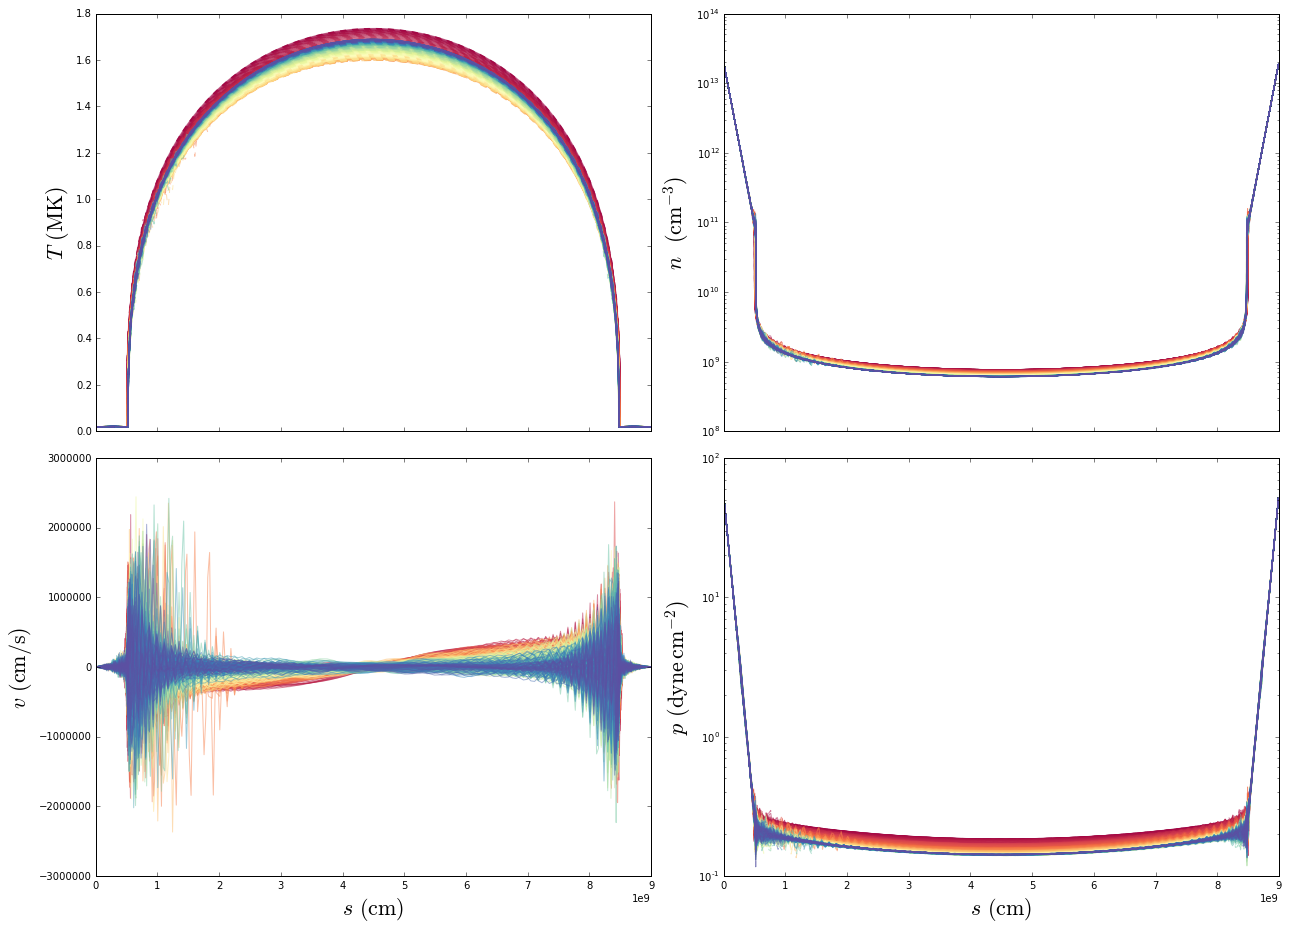

In [3]:
hydrad_steady.load_results()
hydrad_steady.plot_profile(line_cm='Spectral')

Try to make a movie from the profiles.

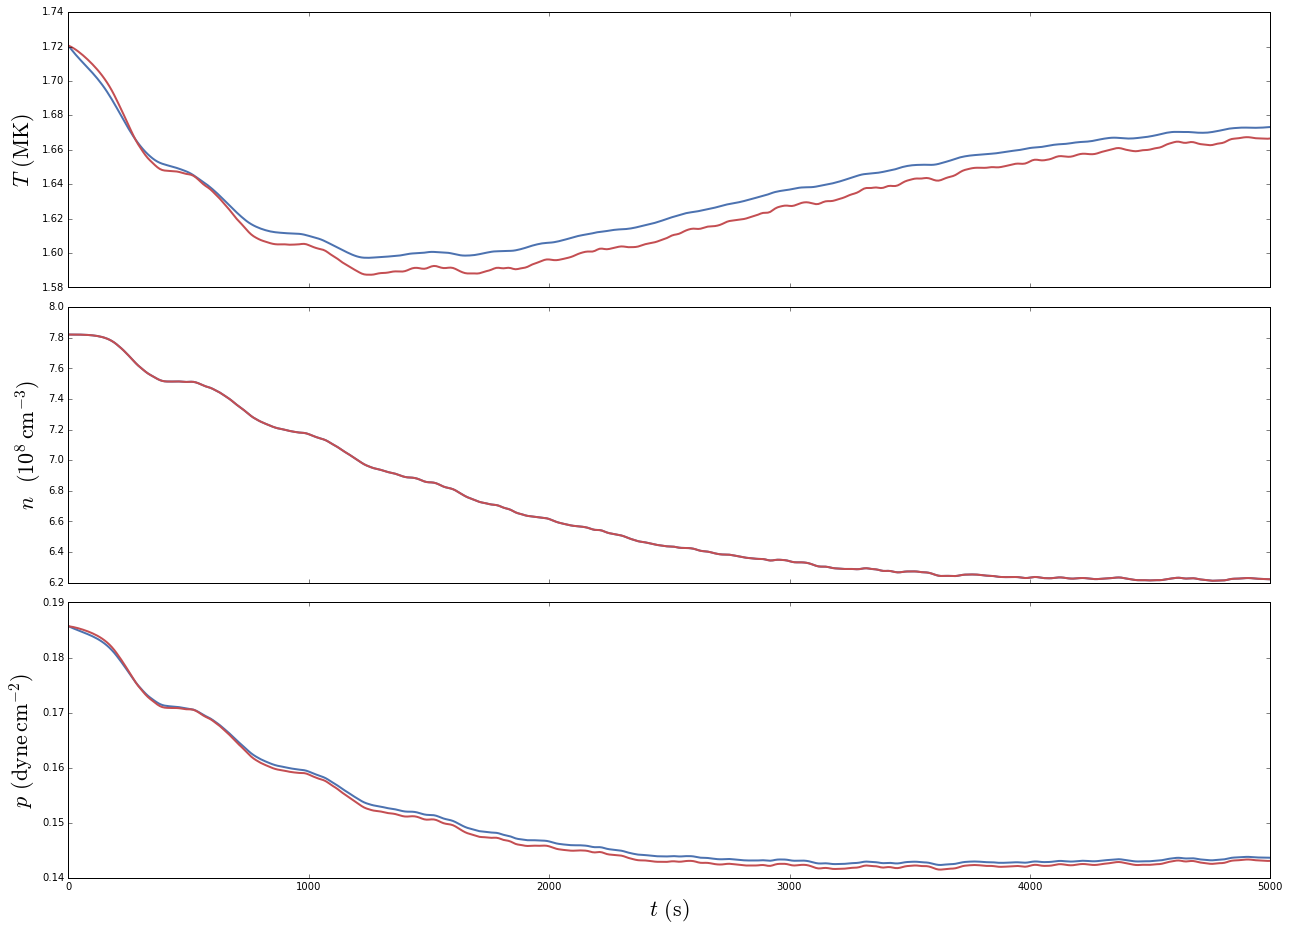

In [4]:
hydrad_steady.make_timeseries()
hydrad_steady.plot_timeseries()

Do a comparison for the steady model with the original HYDRAD code to make sure ours is not doing anything weird.

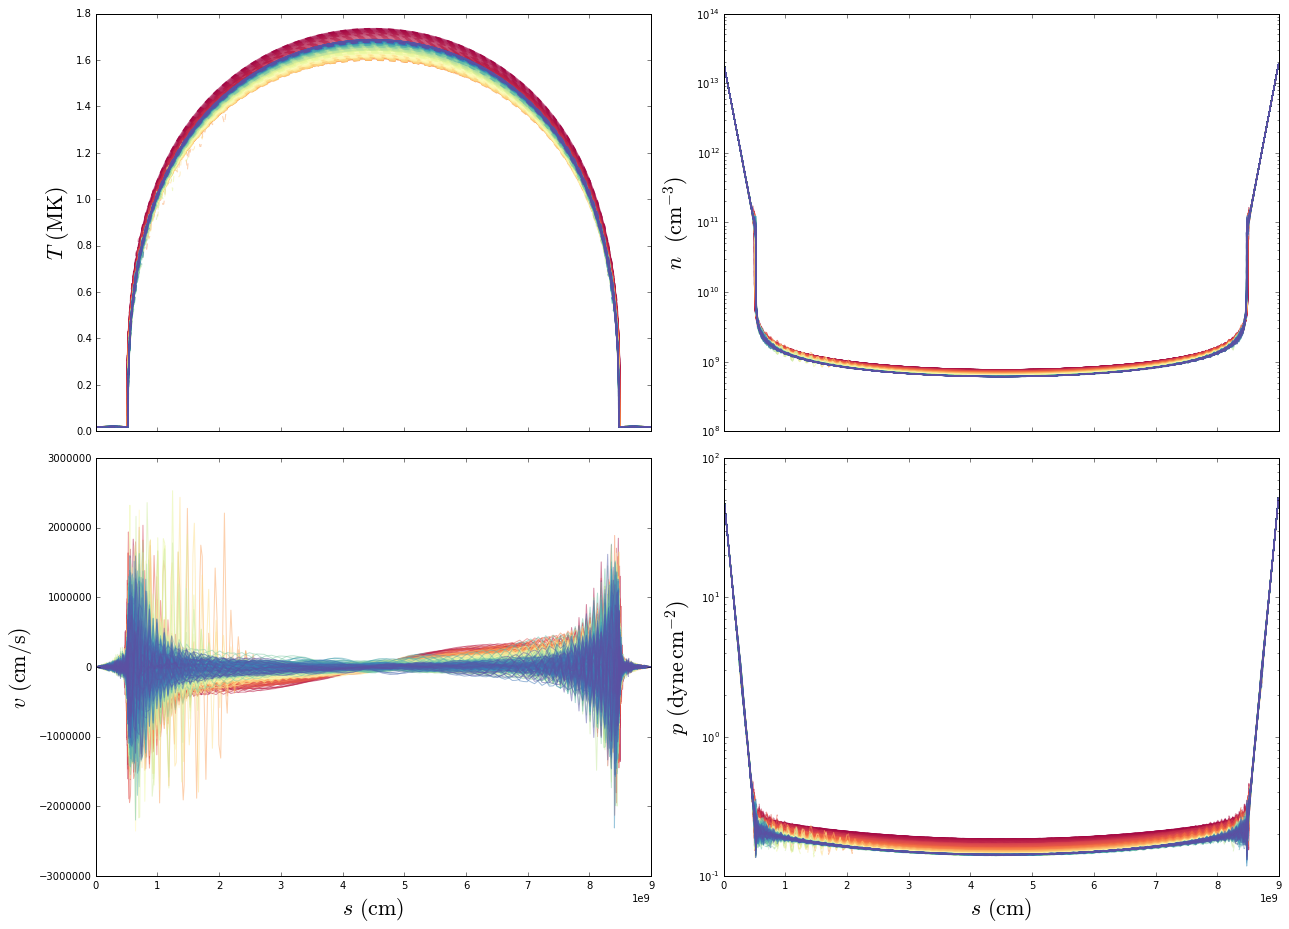

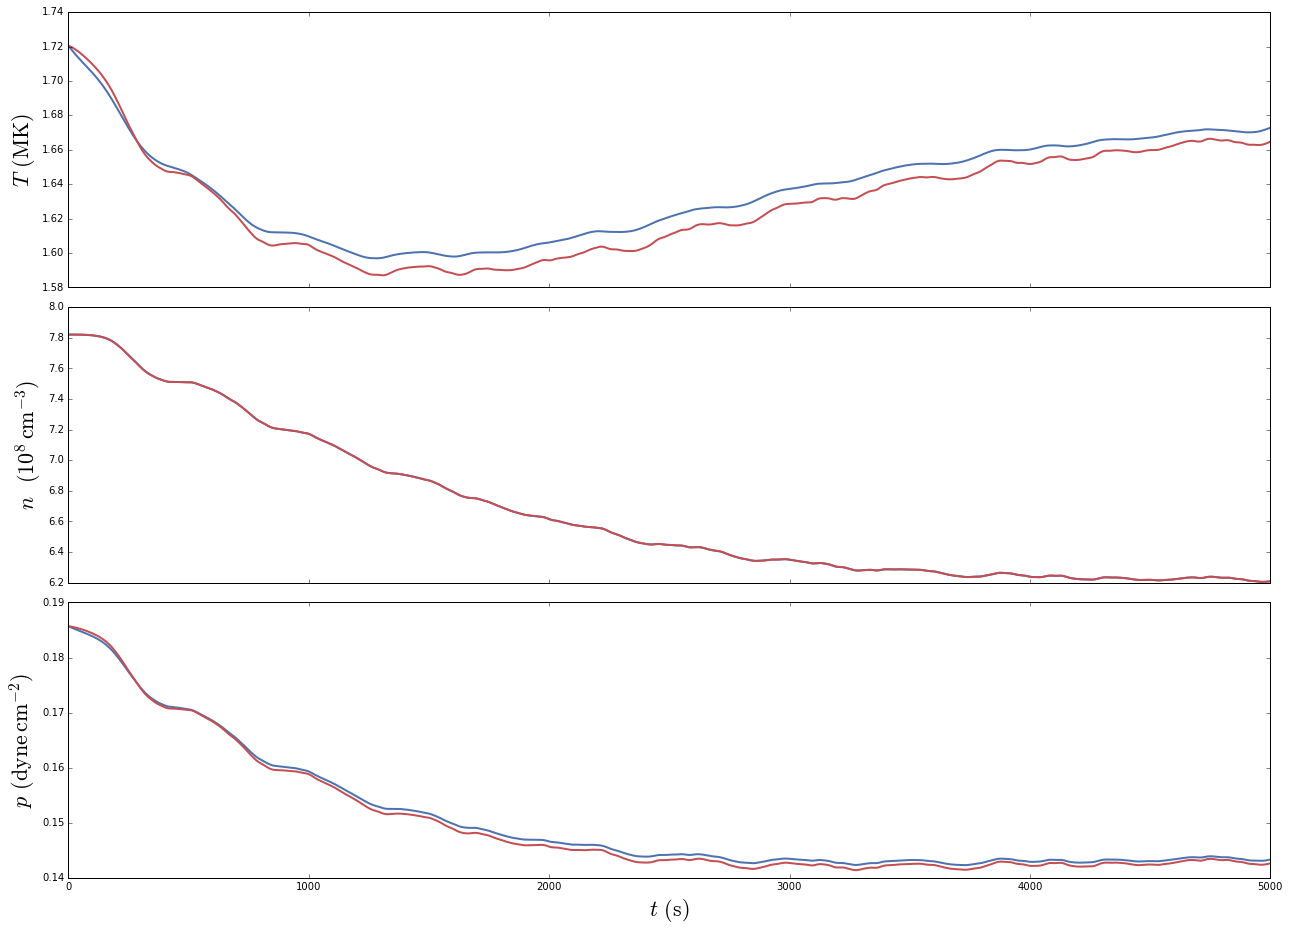

In [5]:
hydrad_steady_original=ql.QuickViewer('/home/wtb2/Desktop/HYDRAD/Results/',figsize=(18,13),fontsize=22)
hydrad_steady_original.load_results()
hydrad_steady_original.plot_profile(line_cm='Spectral')
hydrad_steady_original.make_timeseries()
hydrad_steady_original.plot_timeseries()

Overlay the time series to make a more direct comparison.

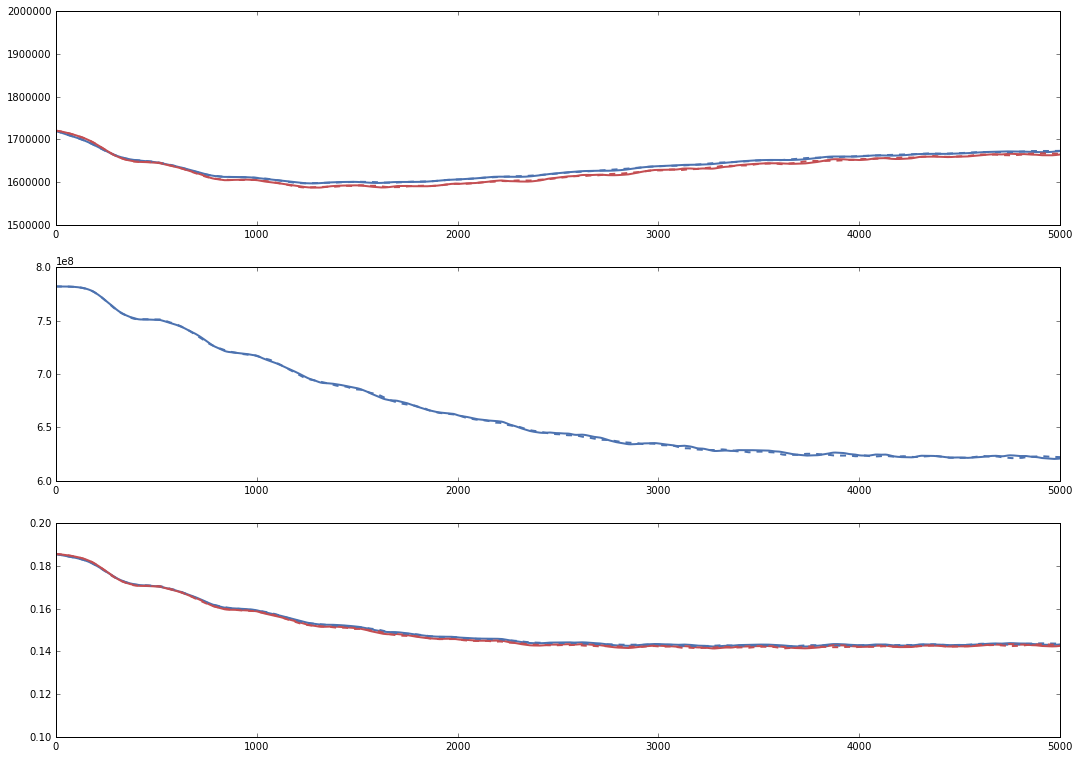

In [6]:
fig,axes=plt.subplots(3,1,figsize=(18,13))
#temperature
axes[0].plot(hydrad_steady_original.time,hydrad_steady_original.timeseries['Te'],color=ql.sns.color_palette('deep')[0],linewidth=2)
axes[0].plot(hydrad_steady_original.time,hydrad_steady_original.timeseries['Ti'],color=ql.sns.color_palette('deep')[2],linewidth=2)
axes[0].plot(hydrad_steady.time,hydrad_steady.timeseries['Te'],linestyle='--',color=ql.sns.color_palette('deep')[0],linewidth=2)
axes[0].plot(hydrad_steady.time,hydrad_steady.timeseries['Ti'],linestyle='--',color=ql.sns.color_palette('deep')[2],linewidth=2)
axes[0].set_ylim([1.5e+6,2e+6])
axes[0].set_xlim([0,5000])
#density
axes[1].plot(hydrad_steady_original.time,hydrad_steady_original.timeseries['ne'],color=ql.sns.color_palette('deep')[0],linewidth=2)
axes[1].plot(hydrad_steady.time,hydrad_steady.timeseries['ne'],linestyle='--',color=ql.sns.color_palette('deep')[0],linewidth=2)
axes[1].set_ylim([6e+8,8e+8])
axes[1].set_xlim([0,5000])
#pressure
axes[2].plot(hydrad_steady_original.time,hydrad_steady_original.timeseries['pe'],color=ql.sns.color_palette('deep')[0],linewidth=2)
axes[2].plot(hydrad_steady_original.time,hydrad_steady_original.timeseries['pi'],color=ql.sns.color_palette('deep')[2],linewidth=2)
axes[2].plot(hydrad_steady.time,hydrad_steady.timeseries['pe'],linestyle='--',color=ql.sns.color_palette('deep')[0],linewidth=2)
axes[2].plot(hydrad_steady.time,hydrad_steady.timeseries['pi'],linestyle='--',color=ql.sns.color_palette('deep')[2],linewidth=2)
axes[2].set_ylim([0.1,0.2])
axes[2].set_xlim([0,5000])
#aesthetics
plt.show()

## Dynamic Model

<table>
    <tr>
        <th rowspan="2" align="center">Duration</th>
        <th rowspan="2" align="center">Loop length</th>
        <th colspan="3" align="center">Heating (1 event)</th>
        <th rowspan="2" align="center">NEI Elements</th>
    </tr>
    <tr>
        <th>Duration</th>
        <th>Magnitude</th>
        <th>Shape</th>
    </tr>
    <tr>
        <td>5000 s</td>
        <td>90 Mm</td>
        <td>100 s</td>
        <td>0.2 erg cm$^{-3}$ s$^{-1}$</td>
        <td>triangular</td>
        <td>Mg, Si, Ca, Fe</td>
    </tr>
</table>

| Version | Execution Time (s) | Execution Time (hrs) |
|:-------:|:--------------:|:----:|
| Original | 79474  | $\approx22$ |
| WTB Fork | 69780  | $\approx19.5$ |

$\Delta(t)\approx-2.5$ hours. This is quite confusing given that the original model cuts out a large amount of the code with `#ifdefs`.

Now let's plot the results and see how they compare. First, plot the loop profiles and timeseries for the original model.

The dashed lines represent the ion quantities. The colorbar runs from red ($t=0$ s) to blue ($t=5000$ s).

In [2]:
hydrad_original=ql.QuickViewer('/home/wtb2/Desktop/HYDRAD/Results_dynamic/',figsize=(18,13),fontsize=22)

In [3]:
hydrad_original.load_results()

In [4]:
hydrad_original.make_timeseries()

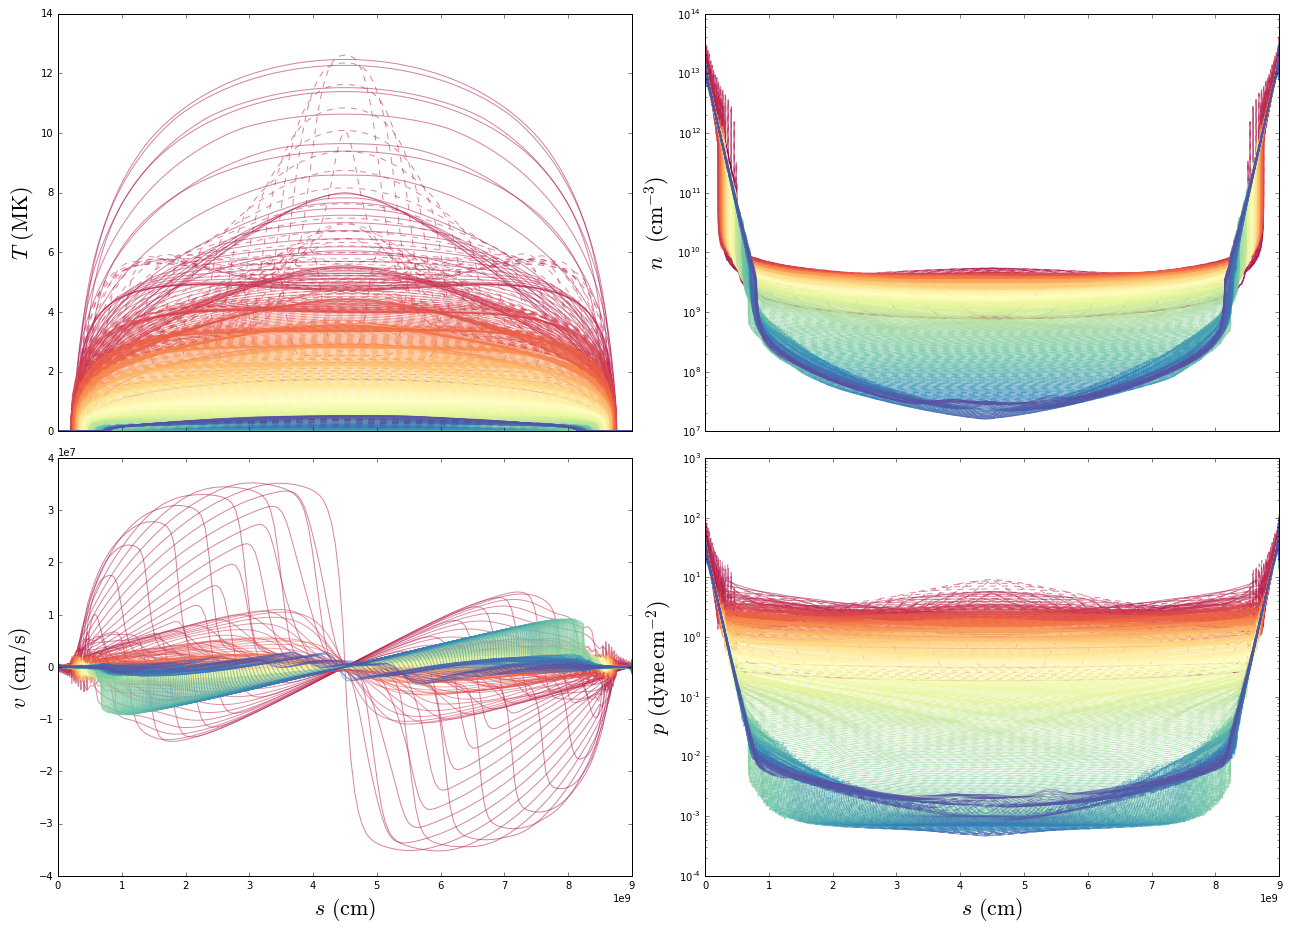

In [5]:
hydrad_original.plot_profile(line_cm='Spectral')

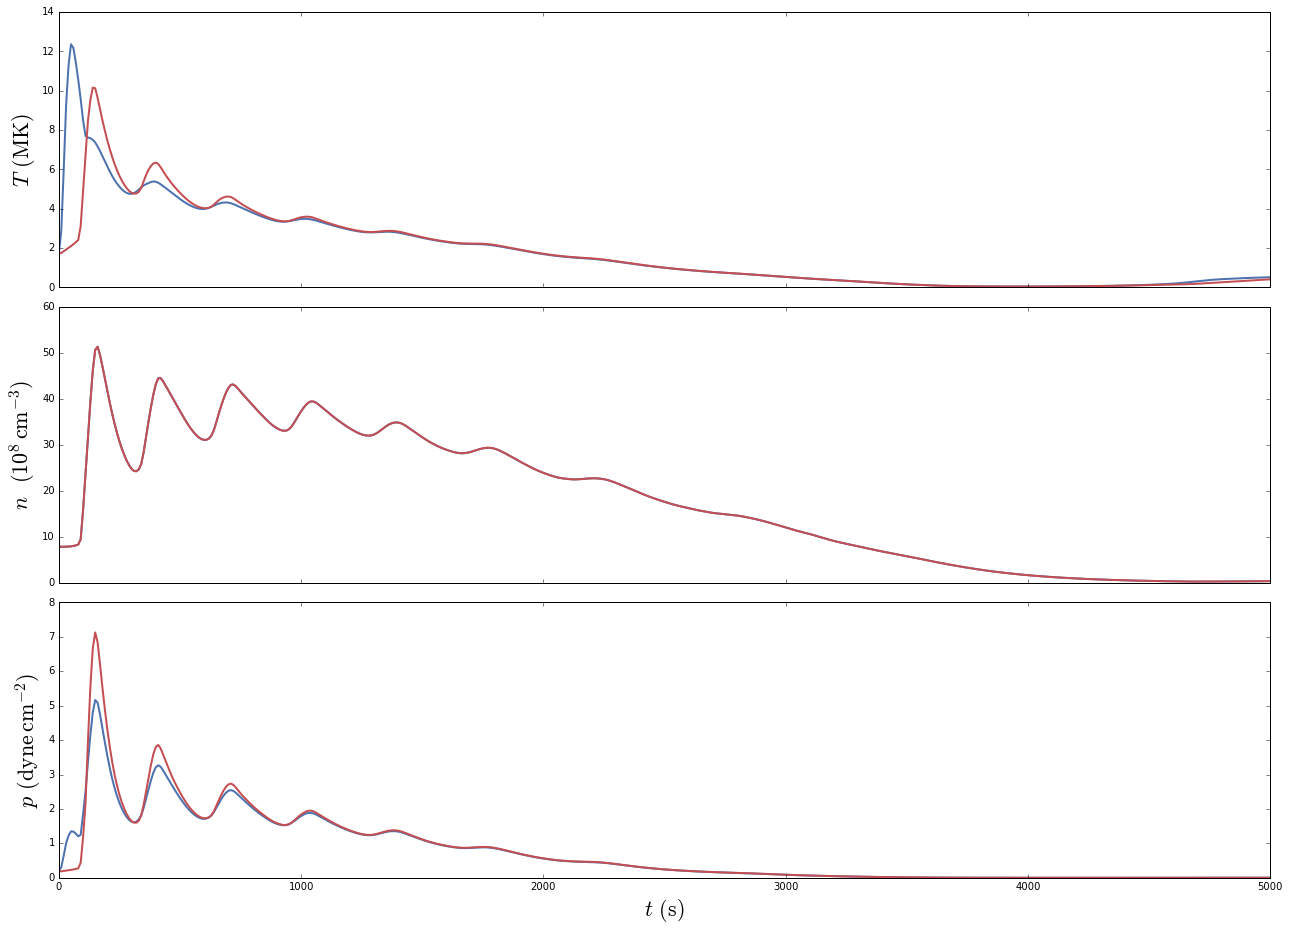

In [6]:
hydrad_original.plot_timeseries()

Now, plot the profiles and timeseries for the WTB Fork.

In [7]:
hydrad_fork=ql.QuickViewer('/data/datadrive2/HYDRAD_runs/tests/dynamic/hydrad/',
                           figsize=(18,13),fontsize=22)

In [8]:
hydrad_fork.load_results()

In [9]:
hydrad_fork.make_timeseries()

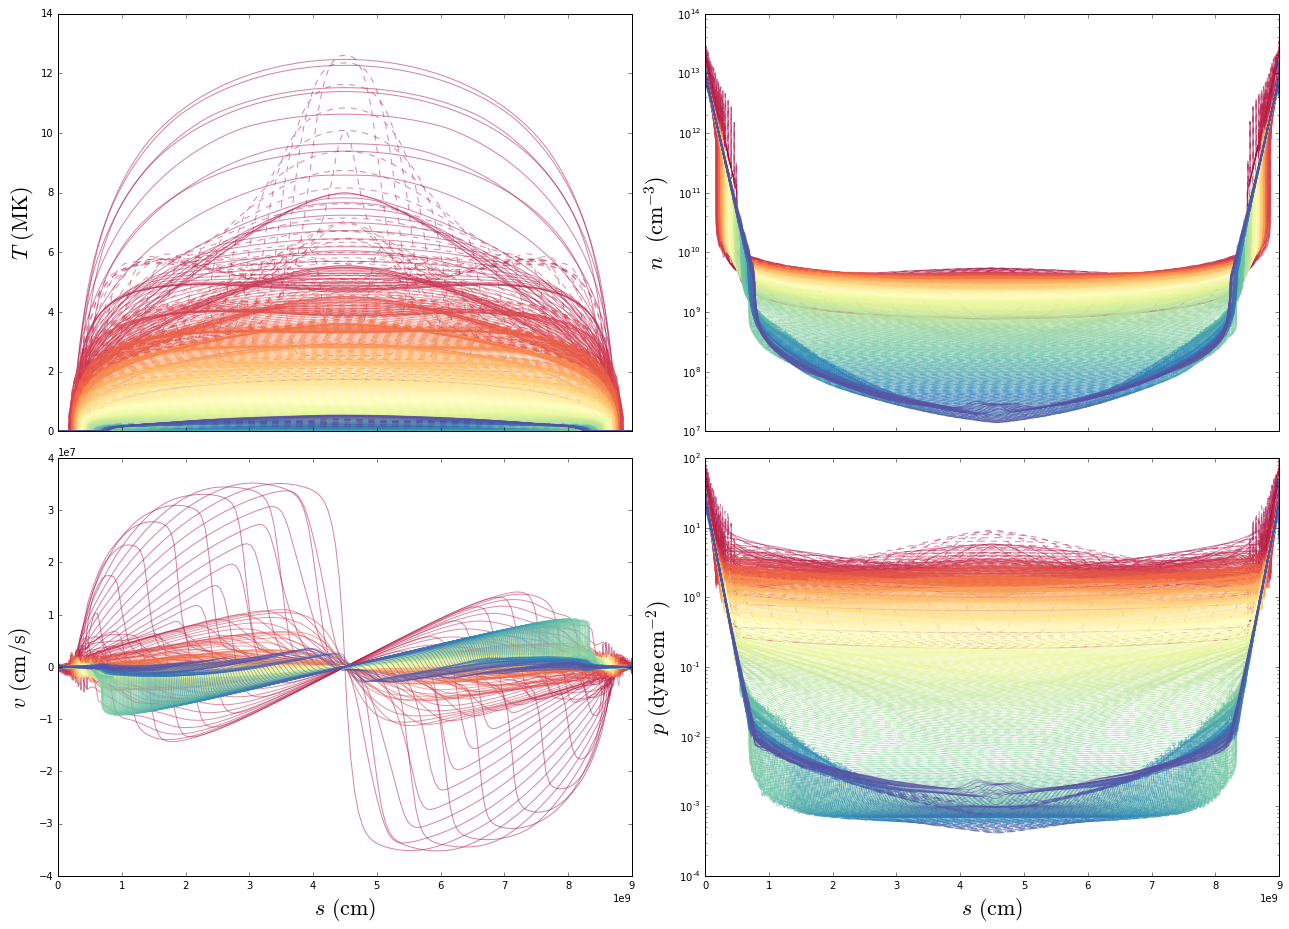

In [10]:
hydrad_fork.plot_profile(line_cm='Spectral')

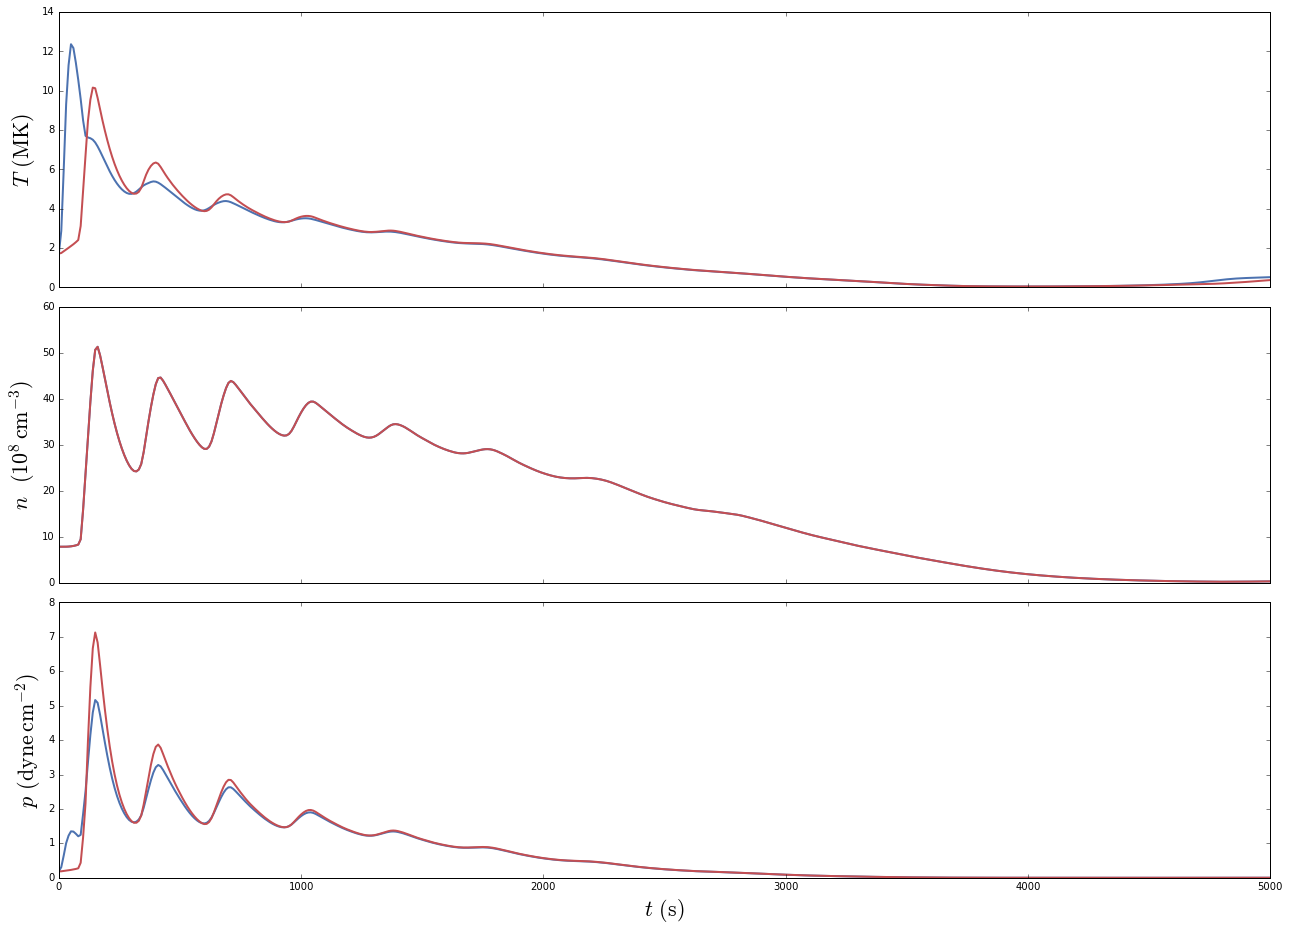

In [11]:
hydrad_fork.plot_timeseries()

Now, let's try to overlay the timeseries plots for the two cases for an easier comparison.

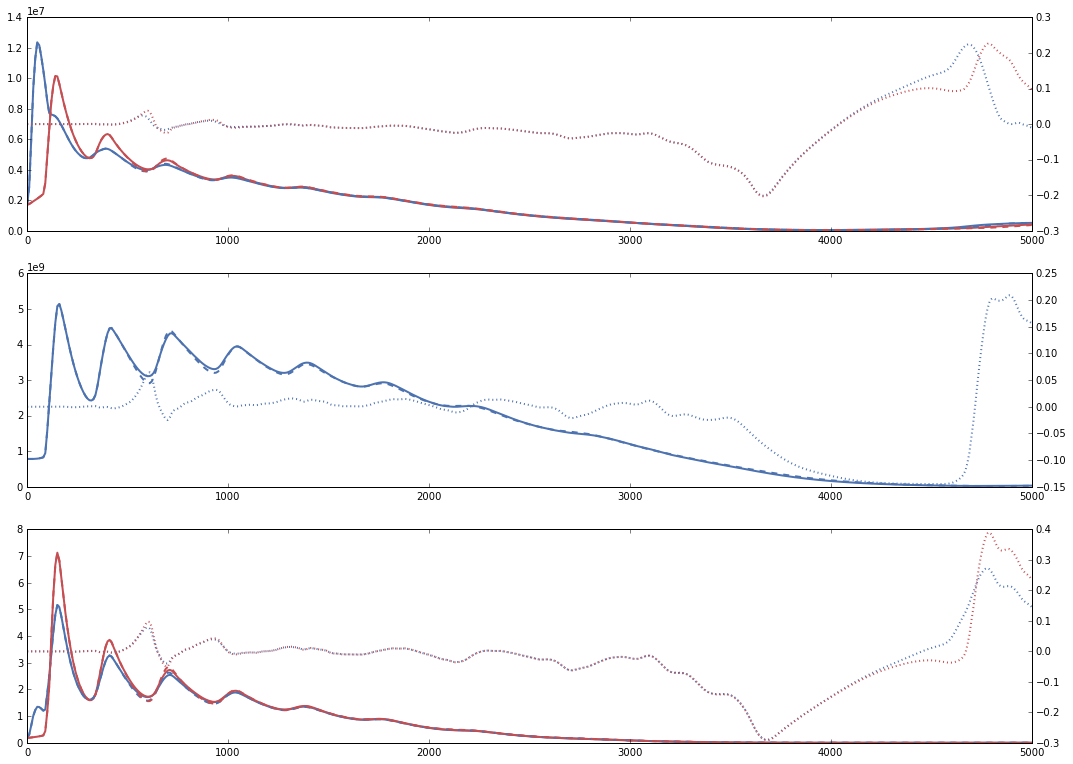

In [16]:
fig,axes=plt.subplots(3,1,figsize=(18,13))
#temperature
axes[0].plot(hydrad_original.time,hydrad_original.timeseries['Te'],color=ql.sns.color_palette('deep')[0],linewidth=2)
axes[0].plot(hydrad_original.time,hydrad_original.timeseries['Ti'],color=ql.sns.color_palette('deep')[2],linewidth=2)
axes[0].plot(hydrad_fork.time,hydrad_fork.timeseries['Te'],linestyle='--',color=ql.sns.color_palette('deep')[0],linewidth=2)
axes[0].plot(hydrad_fork.time,hydrad_fork.timeseries['Ti'],linestyle='--',color=ql.sns.color_palette('deep')[2],linewidth=2)
axes_error_T = axes[0].twinx()
axes_error_T.plot(hydrad_fork.time,(hydrad_original.timeseries['Te']-hydrad_fork.timeseries['Te'])/hydrad_original.timeseries['Te'],
               linestyle='dotted',color=ql.sns.color_palette('deep')[0],linewidth=2)
axes_error_T.plot(hydrad_fork.time,(hydrad_original.timeseries['Ti']-hydrad_fork.timeseries['Ti'])/hydrad_original.timeseries['Ti'],
               linestyle='dotted',color=ql.sns.color_palette('deep')[2],linewidth=2)
#density
axes[1].plot(hydrad_original.time,hydrad_original.timeseries['ne'],color=ql.sns.color_palette('deep')[0],linewidth=2)
axes[1].plot(hydrad_fork.time,hydrad_fork.timeseries['ne'],linestyle='--',color=ql.sns.color_palette('deep')[0],linewidth=2)
axes_error_n = axes[1].twinx()
axes_error_n.plot(hydrad_fork.time,(hydrad_original.timeseries['ne']-hydrad_fork.timeseries['ne'])/hydrad_original.timeseries['ne'],
               linestyle='dotted',color=ql.sns.color_palette('deep')[0],linewidth=2)
#pressure
axes[2].plot(hydrad_original.time,hydrad_original.timeseries['pe'],color=ql.sns.color_palette('deep')[0],linewidth=2)
axes[2].plot(hydrad_original.time,hydrad_original.timeseries['pi'],color=ql.sns.color_palette('deep')[2],linewidth=2)
axes[2].plot(hydrad_fork.time,hydrad_fork.timeseries['pe'],linestyle='--',color=ql.sns.color_palette('deep')[0],linewidth=2)
axes[2].plot(hydrad_fork.time,hydrad_fork.timeseries['pi'],linestyle='--',color=ql.sns.color_palette('deep')[2],linewidth=2)
axes_error_p = axes[2].twinx()
axes_error_p.plot(hydrad_fork.time,(hydrad_original.timeseries['pe']-hydrad_fork.timeseries['pe'])/hydrad_original.timeseries['pe'],
               linestyle='dotted',color=ql.sns.color_palette('deep')[0],linewidth=2)
axes_error_p.plot(hydrad_fork.time,(hydrad_original.timeseries['pi']-hydrad_fork.timeseries['pi'])/hydrad_original.timeseries['pi'],
               linestyle='dotted',color=ql.sns.color_palette('deep')[2],linewidth=2)
#aesthetics
plt.show()

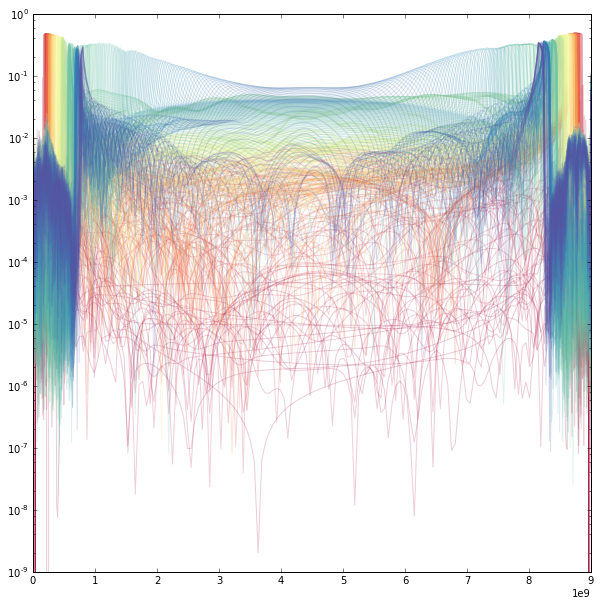

In [37]:
fig = plt.figure(figsize=(10,10))
ax=fig.gca()
colors=ql.sns.color_palette('Spectral',len(np.arange(0,501)))
for i in np.arange(0,501):
    fork_interp=np.interp(hydrad_original.results[i]['s'],hydrad_fork.results[i]['s'],hydrad_fork.results[i]['Te'])
    error_t = np.fabs(fork_interp - hydrad_original.results[i]['Te'])/(hydrad_original.results[i]['Te']+fork_interp)/2.
    ax.plot(hydrad_original.results[i]['s'],error_t,color=colors[i],alpha=0.2)
ax.set_yscale('log')
plt.show()

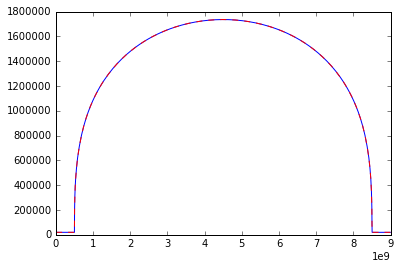

In [38]:
plt.plot(hydrad_fork.results[0]['s'],hydrad_fork.results[0]['Te'],'b-')
plt.plot(hydrad_original.results[0]['s'],hydrad_original.results[0]['Te'],'r--')

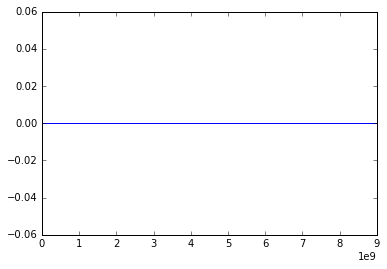

In [41]:
plt.plot(hydrad_original.results[0]['s'],(hydrad_fork.results[0]['Ti']-hydrad_original.results[0]['Ti'])/hydrad_original.results[0]['Ti'])